# The Objective

### The objective of this project is to extract useful data-driven insights about private startups companies that joined the Unicorn club.

# Data Description

### Private companies with the valuation 0ver 0ne billion US dollars as of March 2022 including each company's current valuation, funding country of origin industry, select investors, and the years they were founded and became unicorns.

# Features in The Dataset and Meaning

### . Company: The name of the company.

### . Valuation: Company's valuation in Billion(B) of dollars.

### . Data Joined: The date in which the company reached one billion US dollars.

### . Industry: The company's industry.

### . Country: The country the company was founded in.

### . City: The city the company was founded in.

### . Continent: The continent the company was founded in.

### . Year Founded: The year the company was founded.

### . Funding:  The total amount raised across all funding rounds in billions or millions of dollars.

### . Seleted Investors: Firm or individual investors.

# Importing The Dependencies

In [43]:
# For Data Analysis

import pandas as pd
import numpy as np

# For Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

# Importing The Dataset

In [44]:
pd.set_option("Display.max_columns", None)

In [45]:
Unicorn_data = pd.read_csv('C:\\Users\\LENOVO USER\\Downloads\\Unicorn_Companies.csv')

# Display Top Five of The Dataset

In [46]:
# Let's view the first five rows of our data

Unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


# Display Last Five of The Dataset

In [47]:
# Let's view the last five rows of our dataset

Unicorn_data.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


# Get Information About Our Dataset

In [48]:
Unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


# Data Cleaning

In [49]:
# Let's rename some columns in our dataset for a better understanding

Unicorn_data = pd.DataFrame(Unicorn_data)
Unicorn_data.rename(columns = {'Date Joined' : 'Date'}, inplace = True)
Unicorn_data.rename(columns = {'Select Investors' : 'Investors'}, inplace = True)
Unicorn_data['Investors'] = Unicorn_data['Investors'].to_string()

In [50]:
# Let's split the Date column into three separate columns; Year, Month, and Day

Unicorn_data['Date'] = pd.to_datetime(Unicorn_data['Date'])
Unicorn_data['Year'] = Unicorn_data['Date'].dt.year

Unicorn_data['Date'] = pd.to_datetime(Unicorn_data['Date'])
Unicorn_data['Month'] = Unicorn_data['Date'].dt.month

Unicorn_data['Date'] = pd.to_datetime(Unicorn_data['Date'])
Unicorn_data['Day'] = Unicorn_data['Date'].dt.day

In [51]:
# Get rid of $ and B symbol and convert string column to float

Unicorn_data['Valuation'] = Unicorn_data['Valuation'].replace({'\$': ''}, regex=True)
Unicorn_data['Valuation'] = Unicorn_data['Valuation'].replace({'B': ''}, regex=True)
Unicorn_data['Valuation'] = Unicorn_data['Valuation'].astype(float)

In [52]:
# Get rid of $ and B symbol in the Funding column

# Many characters need replaced in this column
Unicorn_data['Funding'] = Unicorn_data['Funding'].replace({'\$': ''}, regex=True)
Unicorn_data['Funding'] = Unicorn_data['Funding'].replace({'M': ''}, regex=True)
Unicorn_data['Funding'] = Unicorn_data['Funding'].replace({'B': ''}, regex=True)
Unicorn_data['Funding'] = Unicorn_data['Funding'].replace({'K': ''}, regex=True)
Unicorn_data['Funding'] = Unicorn_data['Funding'].replace({'None': 0}, regex=True)

In [53]:
# let's check if our is properly cleaned 

Unicorn_data.head()

,Company,Valuation,Date,Industry,City,Country,Continent,Year Founded,Funding,Investors,Year,Month,Day
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"0 Sequoia Capital China, SIG Asia Invest...",2017,4,7
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"0 Sequoia Capital China, SIG Asia Invest...",2012,12,1
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"0 Sequoia Capital China, SIG Asia Invest...",2018,7,3
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"0 Sequoia Capital China, SIG Asia Invest...",2014,1,23
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"0 Sequoia Capital China, SIG Asia Invest...",2011,12,12


In [54]:
Unicorn_data.tail()

,Company,Valuation,Date,Industry,City,Country,Continent,Year Founded,Funding,Investors,Year,Month,Day
1069,Zhaogang,1.0,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,379,"0 Sequoia Capital China, SIG Asia Invest...",2017,6,29
1070,Zhuan Zhuan,1.0,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,990,"0 Sequoia Capital China, SIG Asia Invest...",2017,4,18
1071,Zihaiguo,1.0,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,80,"0 Sequoia Capital China, SIG Asia Invest...",2021,5,6
1072,Zopa,1.0,2021-10-19,Fintech,London,United Kingdom,Europe,2005,792,"0 Sequoia Capital China, SIG Asia Invest...",2021,10,19
1073,Zwift,1.0,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,620,"0 Sequoia Capital China, SIG Asia Invest...",2020,9,16


# Get Information About Our Dataset

In [55]:
Unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company       1074 non-null   object        
 1   Valuation     1074 non-null   float64       
 2   Date          1074 non-null   datetime64[ns]
 3   Industry      1074 non-null   object        
 4   City          1058 non-null   object        
 5   Country       1074 non-null   object        
 6   Continent     1074 non-null   object        
 7   Year Founded  1074 non-null   int64         
 8   Funding       1074 non-null   object        
 9   Investors     1074 non-null   object        
 10  Year          1074 non-null   int64         
 11  Month         1074 non-null   int64         
 12  Day           1074 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 109.2+ KB


# Find The Shape of Our Dataset (Number of Rows and Columns)

In [56]:
# Let's check the shape of our dataset

Unicorn_data.shape

(1074, 13)

In [57]:
print('Numbers of Rows', Unicorn_data.shape[0])
print('Numbers of Columns', Unicorn_data.shape[1])

Numbers of Rows 1074
Numbers of Columns 13


### There are 1074 rows and 13 columns in our dataset.

# Check The Null Values in Our Dataset

In [58]:
Unicorn_data.isnull().sum()

Company          0
Valuation        0
Date             0
Industry         0
City            16
Country          0
Continent        0
Year Founded     0
Funding          0
Investors        0
Year             0
Month            0
Day              0
dtype: int64

# Handling Missing Values

### Mode..... The most repeated value

In [59]:
# Find the mode in the missing values of the 'City' column

Mode = Unicorn_data['City'].mode()

In [60]:
print(Mode)

0    San Francisco
Name: City, dtype: object


In [61]:
# Let's replace the missing values in the 'City' column with the mode

Unicorn_data['City'].fillna(Unicorn_data['City'].mode()[0], inplace = True)

In [62]:
# Let's check if the missing values in the City column was sucessfully replaced with mode

Unicorn_data.isnull().sum()

Company         0
Valuation       0
Date            0
Industry        0
City            0
Country         0
Continent       0
Year Founded    0
Funding         0
Investors       0
Year            0
Month           0
Day             0
dtype: int64

# Checking For Duplicates

In [63]:
# Let's check if there is any duplicate in our data

print(Unicorn_data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1069    False
1070    False
1071    False
1072    False
1073    False
Length: 1074, dtype: bool


### No duplicate is found in our dataset.

# Let's Get The Statistics Of The Dataset

In [64]:
Unicorn_data.describe()

,Valuation,Year Founded,Year,Month,Day
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,3.455307,2012.895717,2019.896648,6.350093,15.821229
std,8.547022,5.698573,2.001288,3.504007,8.541422
min,1.000000,1919.000000,2007.000000,1.000000,1.000000
25%,1.000000,2011.000000,2019.000000,3.000000,9.000000
50%,2.000000,2014.000000,2021.000000,6.000000,16.000000
75%,3.000000,2016.000000,2021.000000,9.000000,23.000000
max,180.000000,2021.000000,2022.000000,12.000000,31.000000


### . The average valuation in our dataset is 3 billion US dollars. Also the maximum valuation is 180 billion US dollars.

### . The average and the maximum year the companies were founded are 2019 and 2021 respectively.

### . The average and the maximum year the companies joined the unicorn companies are 2019 and 2022 respectively.

In [65]:
# Let's the positive and negative correlation in our data

correlation = Unicorn_data.corr()

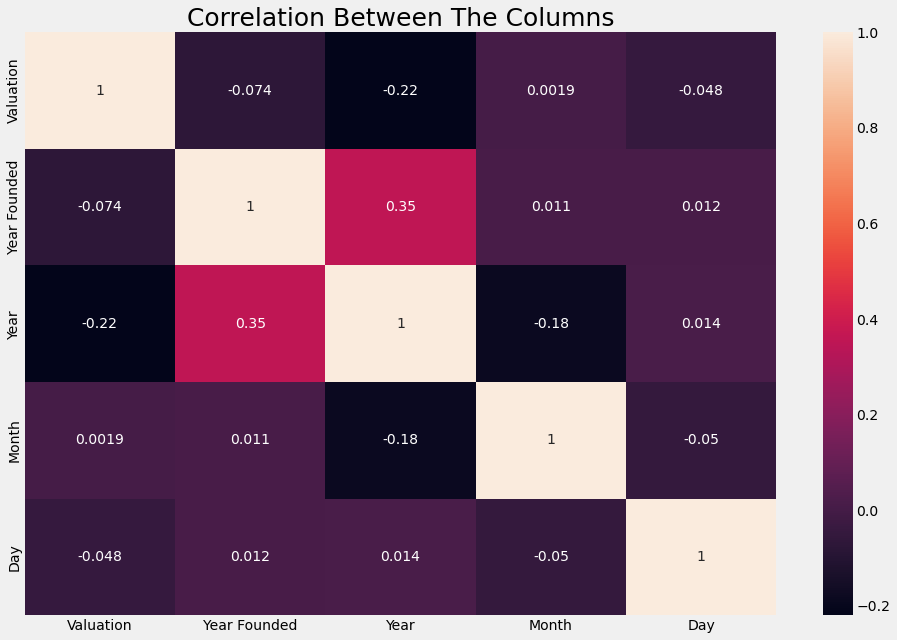

In [66]:
# Let's construct a heatmap to understand the correlation

plt.figure(figsize = (15,10))
sns.heatmap(Unicorn_data.corr(), annot = True)
plt.title('Correlation Between The Columns', fontsize = 25)
plt.show()

In [67]:
Unicorn_data.describe(include='object')

,Company,Industry,City,Country,Continent,Funding,Investors
count,1074,1074,1074,1074,1074,1074,1074
unique,1073,16,256,46,6,537,1
top,Bolt,Fintech,San Francisco,United States,North America,1,"0 Sequoia Capital China, SIG Asia Invest..."
freq,2,224,168,562,589,61,1074


### . We have 1073 companies, 18 industries, 256 cities, 46 countries and continents in our dataset.

### . Fintech is the top industry in our dataset.

### . San Francisco is the top city in our dataset.

### . United States is the top country of the startups.

### . North America is the top continent in our dataset.

# EXPLORATORY DATA ANALYSIS

In [68]:
# Let's view our data again

Unicorn_data.head()

,Company,Valuation,Date,Industry,City,Country,Continent,Year Founded,Funding,Investors,Year,Month,Day
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"0 Sequoia Capital China, SIG Asia Invest...",2017,4,7
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"0 Sequoia Capital China, SIG Asia Invest...",2012,12,1
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"0 Sequoia Capital China, SIG Asia Invest...",2018,7,3
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"0 Sequoia Capital China, SIG Asia Invest...",2014,1,23
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"0 Sequoia Capital China, SIG Asia Invest...",2011,12,12


# The Top Five Unicorn Startups in Different Industry Sector

In [69]:
Unicorn_data['Industry'].value_counts().head()

Fintech                            224
Internet software & services       205
E-commerce & direct-to-consumer    111
Health                              74
Artificial intelligence             73
Name: Industry, dtype: int64

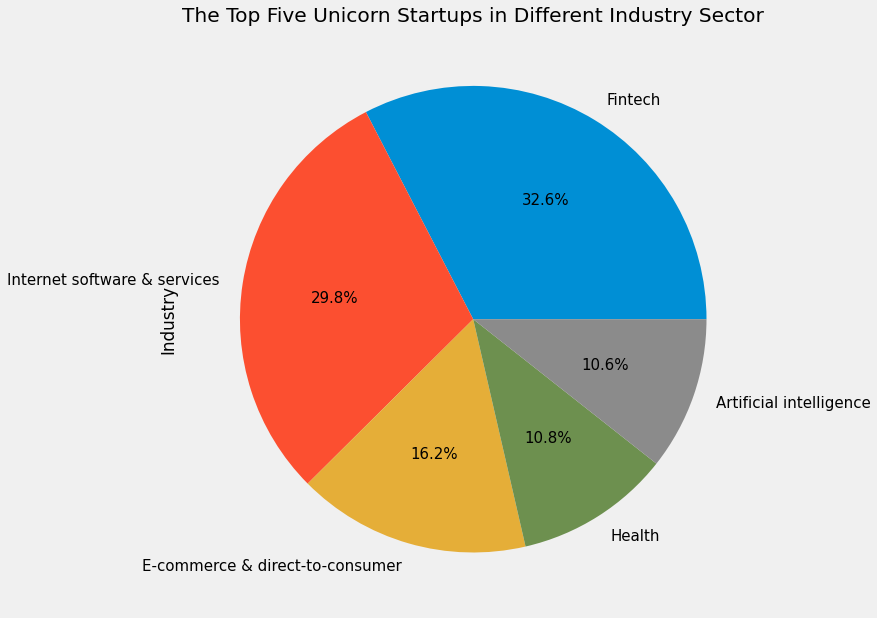

In [70]:
Unicorn_data['Industry'].value_counts().head().plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%', title = 'The Top Five Unicorn Startups in Different Industry Sector', fontsize=15)
plt.show()

### . Fintech is the leading startup industry with 32.6%.

### . Internet software and services following with 29.8%.

### . E-commerce and direct-to-consumer with 16.2%.

### . Health with 10.8%.

### . Artificial Intelligence with 10.6%.

# The Top Five Valued Companies in the World

In [71]:
Unicorn_data.groupby('Company')['Valuation'].sum().sort_values(ascending=False).head()

Company
Bytedance    180.0
SpaceX       100.0
SHEIN        100.0
Stripe        95.0
Klarna        46.0
Name: Valuation, dtype: float64

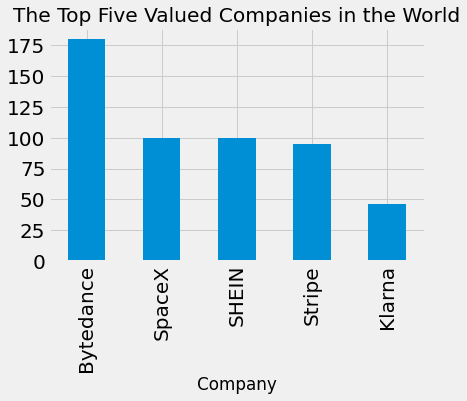

In [72]:
# Let's visualize the data 

Unicorn_data.groupby('Company')['Valuation'].sum().sort_values(ascending=False).head().plot(kind='bar', title='The Top Five Valued Companies in the World', fontsize=20)
plt.show()

### . Bytedance is the most valued company in the world with the valuation of 180 Billion US Dollars.

### . SpaceX following with the valuation of 100 Billion US Dollars.

### . SHEIN with the valuation of 100 Billion US Dollars.

### . Stripe with the valuation of 95 Billion US Dollars.

### . Klarna with the valuation of 46 Billion US Dollars.

# The Least Five Valued Companies in the World

In [73]:
Unicorn_data.groupby('Company')['Valuation'].sum().sort_values(ascending=False).tail()

Company
Papa            1.0
Panther Labs    1.0
Figment         1.0
PandaDoc        1.0
LivSpace        1.0
Name: Valuation, dtype: float64

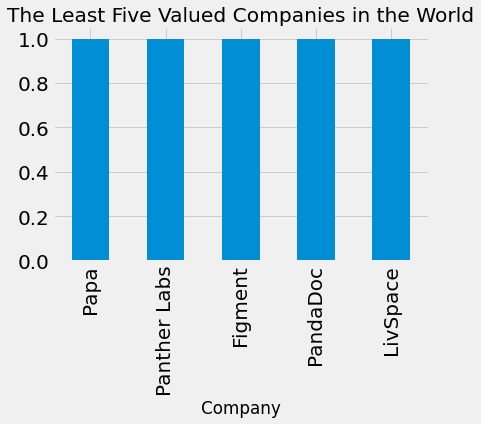

In [74]:
# Let's visualize the data

Unicorn_data.groupby('Company')['Valuation'].sum().sort_values(ascending=False).tail().plot(kind='bar', title='The Least Five Valued Companies in the World', fontsize=20)
plt.show()

### . Papa, Panther Labs, Figment, PandaDoc and Livespace are the least valued companies in our dataset with the valuation of 1 billion US dollars.

# The Top Five Valued Startup Cities in the World

In [75]:
Unicorn_data.groupby('City')['Valuation'].sum().sort_values(ascending=False).head()

City
San Francisco    782.0
Beijing          348.0
New York         233.0
London           178.0
Shenzhen         141.0
Name: Valuation, dtype: float64

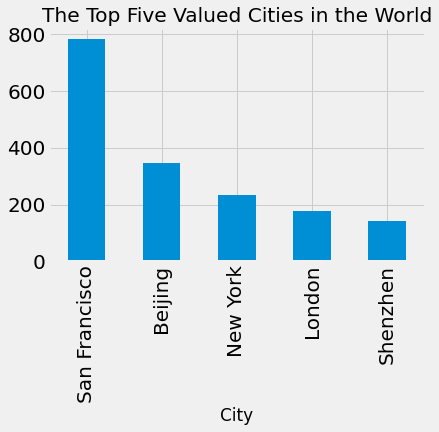

In [76]:
Unicorn_data.groupby('City')['Valuation'].sum().sort_values(ascending=False).head().plot(kind='bar', title='The Top Five Valued Cities in the World', fontsize=20)
plt.show()

### The following insights are be extracted from the visual representation above;

### . San Francisco is the most valued startup city in the world with the Valuation of 782 Bilion US Dollars.
### . Beijing with the Valuation of 348 Billion US Dollars.
### . New York with the Valuation of 233 Billion US Dollars.
### . London with the Valuation of 178 Billion US Dollars.
### . Shenzhen with the Valuation of 141 Billion US Dollars.

# The Least Valued Cities in the World

In [77]:
Unicorn_data.groupby('City')['Valuation'].sum().sort_values(ascending=False).tail()

City
Roubaix       1.0
Hyderabad     1.0
Islandia      1.0
Ramat Gan     1.0
Framingham    1.0
Name: Valuation, dtype: float64

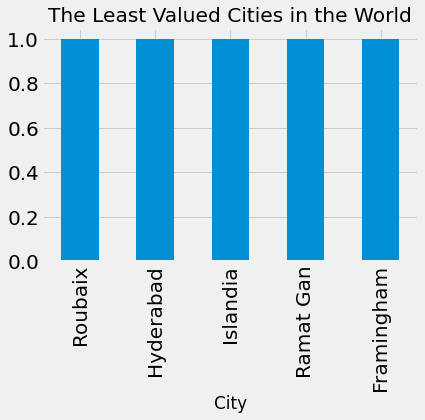

In [78]:
Unicorn_data.groupby('City')['Valuation'].sum().sort_values(ascending=False).tail().plot(kind='bar', title='The Least Valued Cities in the World', fontsize=20)
plt.show()

### . The following cities are the least valued cities in our data with the valuation 1 billion US dollars RoubaiX, Hyderabad, Islandia, Ramat Gan, and Framingham.

# The Top Ten Valued Startup Countries in the World

In [79]:
Unicorn_data.groupby('Country')['Valuation'].sum().sort_values(ascending=False).head(10)

Country
United States     1933.0
China              696.0
India              196.0
United Kingdom     195.0
Germany             72.0
Sweden              63.0
Australia           56.0
France              55.0
Canada              49.0
South Korea         41.0
Name: Valuation, dtype: float64

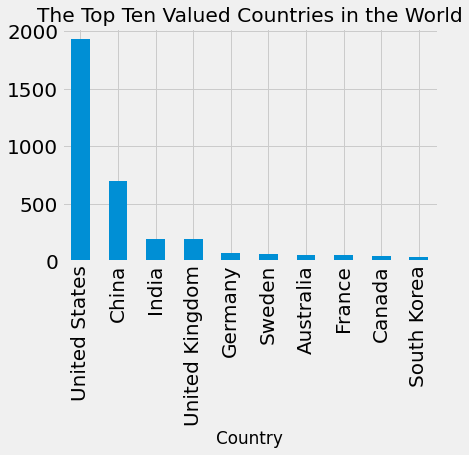

In [80]:
Unicorn_data.groupby('Country')['Valuation'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='The Top Ten Valued Countries in the World', fontsize=20)
plt.show()

### . United States is the most valued startup country in the world with the valuation of 1.9 billion US dollars.

### . China with the valuation of 696 billion US dollars.

### . India with the valuation of 196 billion US dollars.

### . United Kingdom with the valuation of 195 billion US dollars.

### . Germany with the valuation of 72 billion US dollars.

### . Sweden with the valuation of 63 billion US dollars.

### . Australia with the valuation of 56 billion US dollars.

### . Ftance with the valuation of 55 billion US dollars.

### . Canada with the valuation of 49 billion US dollars.

### . South Korea with the valuation of 41 billion US dollars.

# The Least Ten Valued Countries in the World

In [81]:
Unicorn_data.groupby('Country')['Valuation'].sum().sort_values(ascending=False).tail(10)

Country
Thailand          3.0
Argentina         2.0
Senegal           2.0
Nigeria           2.0
Malaysia          2.0
Luxembourg        2.0
Bermuda           2.0
Czech Republic    1.0
Croatia           1.0
Italy             1.0
Name: Valuation, dtype: float64

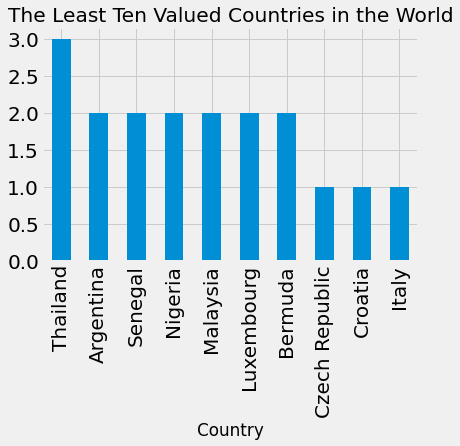

In [82]:
Unicorn_data.groupby('Country')['Valuation'].sum().sort_values(ascending=False).tail(10).plot(kind='bar', title='The Least Ten Valued Countries in the World', fontsize=20)
plt.show()

### . Apart from Thailand that has the valuation of 3 billion US dollars.The following countries are valued for 2 billion US dollars; Argentina, Senegal, Nigeria, Malaysia, Luxemburg and Bermuda.

### . Czech Republic, Crotia, and Italy are valued for 1 billion US dollars.

# The Most Valued Startup Continents in the World

In [83]:
Unicorn_data.groupby('Continent')['Valuation'].sum().sort_values(ascending=False).head(6)

Continent
North America    2032.0
Asia             1067.0
Europe            503.0
Oceania            56.0
South America      48.0
Africa              5.0
Name: Valuation, dtype: float64

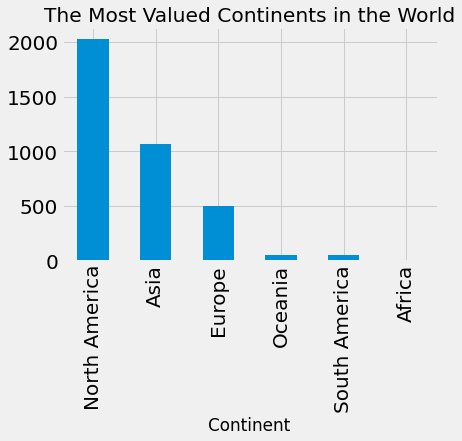

In [84]:
Unicorn_data.groupby('Continent')['Valuation'].sum().sort_values(ascending=False).head(6).plot(kind='bar', title='The Most Valued Continents in the World', fontsize=20)
plt.show()

### . North America is the most valued startup continent in the world with the valuation of 2 billion US dollars.

### . Followed by Asia with the valuation of 1.1 billion US dollars.

### . Europe with the valuation of 503 billion US dollars.

### . Oceania with the valuation of 56 billion US dollars.

### . South America with the valuation of 48 US dollars.

### . Africa with the valuation of 5 billion US dollars.

# Key Insights

### . The average valuation in our dataset is 3 billion US dollars. Also the maximum valuation is 180 Billion US Dollars.

### . The average and the maximum year the companies were founded are 2019 and 2021 respectively.

### . The average and the maximum year the companies joined the unicorn clubs are 2019 and 2022 respectively.

### . There are 1073 companies, 18 industries, 256 cities, 46 countries and continents in our dataset.

### . Fintech is the top industry in our dataset.

### . San Francisco is the top city in our dataset.

### . United States is the top country of the startups.

### . North America is the top continent in our dataset.

### . SpaceX joined the Unicorn club in 2012.

### . Stripe joined the Unicorn club in 2014.

### . Bytedance joined the Unicorn club in 2017.

### . Plaid joined the Unicorn club in 2018.

### . Chime joined the Unicorn club in 2019.

### . Canva company was founded in 2012.

### . Sendbird company was founded in 2013.

### . Grammarly company was founded in 2019.

### . Stripe was founded in 2010.

### . SpaceX was founded in 2002.

### . Fintech is leading with 32.6% in the industry, Internet software and services following with 29.8%, E-commerce and direct-to-consumer with 16.2%, Health with 10.8%, and Artificial Intelligence following with 10.6%. The above mentioned are the top five industries in our data.

### . San Francisco is the most valued startup city in the world with the Valuation of 782 Billion US Dollars, Beijing with the Valuation of 348 Billion US Dollars, New York with the Valuation of 233 Billion US Dollars, London with the Valuation of 178 Billion US Dollars, and Shenzhen with the Valuation of 141 Billion US Dollars. They are the top five valued startup cities in the world.

### . The following cities are the least valued cities in our data with the valuation 1 billion US dollars RoubaiX, Hyderabad, Islandia, Ramat Gan, and Framingham.

### . United States is the most valued startup company in the world with the Valuation of 1.9 Billion US Dollars, China with the Valuation of 696 Billion US Dollars, India with the Valuation of 196 Billion US Dollars, United Kingdom with the Valuation of 195 Billion US Dollars, Germany with the Valuation of 72 Billion US Dollars, Sweden with the Valuation of 63 Billion US Dollars, Australia with the Valuation of 56 Billion US Dollars, France with the Valuation of 55 Billion US Dollars, Canada with the Valuation of 49 Billion US Dollars, and South Korea with the Valuation of 41 Billion US Dollars. The countries above are the top ten countries in the world.

### . Apart Thailand that has the valuation of 3 billion US dollars.The following countries are valued for 2 billion US dollars; Argentina, Senegal, Nigeria, Malaysia, Luxemburg and Bermuda. Czech Republic, Crotia, and Italy are valued for 1 billion US dollars

### . North America is the most valued startup continent in the world with the valuation of 2 Billion US Dollars, Followed by Asia with the valuation of 1.1 billion US dollars, Europe with the valuation of 503 billion US dollars, Oceania with the valuation of 56 billion US dollars, South America with the valuation of 48 US dollars, and Africa with the valuation of 5 billion US dollars.

### . Bytedance is the most valued company in the world with the valuation of 180 Billion US Dollars, SpaceX following with the valuation of 100 Billion US Dollars, SHEIN with the valuation of 100 Billion US Dollars, Stripe with the valuation of 95 Billion US Dollars, and Klarna with the valuation of 46 Billion US Dollars.

### . Papa, Panther Labs, Figment, PandaDoc and Livespace are the least valued companies in our dataset with the valuation of 1 billion US dollars.

# Observations and Recommendations

### . If you are technology-minded, San Francisco, Beijing, New York, London, and Shenzhen are the cities for you. Staying in those cities can be rewarding.

### . Avoid cities like Roubaix, Hyderabad, Islandia, Ramat Gan, and Framingham.

### . If you want to migrate to a technology wise. The following countries should be your go-to-country, USA, China, India, United Kingdom, Germany, Sweden, Australia, France, Canada, and South Korea.

### . Avoid countries like Thailand, Argentina, Senegal, Nigeria, Malaysia, Luxembourg, Bermuda, Czech Republic, Crotia, and Italy. They are not tech hub countries.

### . North America, Asia, Europe, Ocenia, and South America are the most valued startup continent in the world.

### . Bytedance, SpaceX, SHEIN, Stripe, and Klarna are the most valued company in the world.